# ENADE 2017

Dados do curso de Bacharelado em Ciência da Computação das Universidades/Faculdades da Região Nordeste

**Como é calculada a nota do ENADE?**

Para calcular a nota do ENADE, são tiradas separadamente as médias das notas dos estudantes na prova de Formação Geral e na de Componente Específico. Em seguida, é calculada uma média ponderada entre esses dois valores, sendo atribuído peso 1 ao primeiro e 3 ao segundo.

As médias obtidas pelos alunos são então padronizadas, de acordo com a média brasileira e o desvio padrão, em conceitos que vão de 1 a 5. Sendo atribuído o conceito 3 aos cursos que estão na média ou próximos a ela, 1 e 2 aos que estão abaixo e 4 e 5 aos que estão acima.

Dessa forma, **a nota do ENADE é sempre um valor relativo**, ou seja, aponta para uma **comparação entre o curso da instituição de ensino superior observada e os cursos restantes daquela área no país**

### Carregando as bibliotecas necessárias

In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Carregando e verificando os dados

In [2]:
# Dados do Exame Nacional de Desempenho dos Estudantes - 2017 (Curso de computação do nordeste)
df = pd.read_csv('dados/enade2017_computacao_ne_clean.csv')

In [3]:
# Exibindo o cabeçalho do dataframe
df.head()

,CO_IES,Instituicao,CO_CATEGAD,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I17,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I24,QE_I25,QE_I26,NT_GER
0,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,D,...,A,A,A,A,A,D,A,A,A,45.0
1,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,F,22,E,...,A,A,A,B,D,A,A,B,F,48.0
2,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,27,B,...,B,A,A,A,A,A,B,A,A,55.0
3,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,32,D,...,B,A,A,A,A,B,B,A,B,23.0
4,548,UNIVERSIDADE FEDERAL DO MARANHÃO (UFMA),1,11452,CIÊNCIA DA COMPUTAÇÃO,São Luís,MA,M,25,B,...,A,A,A,E,B,B,A,A,B,54.0


In [4]:
# Tamanho do dataframe
print('O dataframe é composto por', df.shape[0], 'linhas e', df.shape[1], 'colunas')

O dataframe é composto por 1427 linhas e 33 colunas


In [5]:
# Exibindo as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 33 columns):
CO_IES         1427 non-null int64
Instituicao    1427 non-null object
CO_CATEGAD     1427 non-null int64
CO_CURSO       1427 non-null int64
NO_CURSO       1427 non-null object
Municipio      1427 non-null object
UF             1427 non-null object
TP_SEXO        1427 non-null object
NU_IDADE       1427 non-null int64
QE_I01         1427 non-null object
QE_I02         1427 non-null object
QE_I04         1427 non-null object
QE_I05         1427 non-null object
QE_I06         1427 non-null object
QE_I07         1427 non-null object
QE_I08         1427 non-null object
QE_I09         1427 non-null object
QE_I10         1427 non-null object
QE_I11         1427 non-null object
QE_I12         1427 non-null object
QE_I13         1427 non-null object
QE_I14         1427 non-null object
QE_I15         1427 non-null object
QE_I17         1427 non-null object
QE_I18         1427 non-null obje

In [6]:
# Descrevendo as variáveis numéricas
desc_int = df.drop(['CO_IES', 'CO_CURSO'], axis=1).describe(include=[np.number])
desc_int.loc['count'] = desc_int.loc['count'].astype(int).astype(str)
desc_int.iloc[1:] = desc_int.iloc[1:].applymap('{:.0f}'.format)
desc_int.T

,count,mean,std,min,25%,50%,75%,max
CO_CATEGAD,1427,3,2,1,1,2,4,7
NU_IDADE,1427,25,4,20,23,24,27,54
NT_GER,1427,44,13,8,34,43,52,83


In [7]:
# Descrevendo as variáveis categóricas
cat_obj = df.drop(['Instituicao', 'Municipio', 'UF', 'NO_CURSO'], axis=1).describe(include=[np.object])
cat_obj.T

,count,unique,top,freq
TP_SEXO,1427,2,M,1254
QE_I01,1427,5,C,785
QE_I02,1427,5,B,769
QE_I04,1427,5,C,691
QE_I05,1427,5,B,492
QE_I06,1427,5,D,862
QE_I07,1427,5,D,584
QE_I08,1427,4,A,1249
QE_I09,1427,6,D,628
QE_I10,1427,3,A,1410


### Pré-processessamento dos dados

In [8]:
#### Selecionando as variáveis que serão utilizadas
df = df[['TP_SEXO', 'NU_IDADE', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05',
       'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12',
       'QE_I13', 'QE_I14', 'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20',
       'QE_I21', 'QE_I22', 'QE_I24', 'QE_I25', 'QE_I26','NT_GER']]

#### Convertendo recursos categóricos

A biblioteca do scikit trabalha exclusivamente com atributos numéricos. Logo, é necessário transformar os campos categóricos em variáveis dummy (a variável dummy é uma variável categegórica transformada em numérica). Caso contrário, nosso algoritmo não aceitará esses atributos diretamente como entradas.

In [9]:
# Listando as colunas com variáveis categóricas
df.dtypes[df.dtypes == "object"].index

Index(['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
       'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
       'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I24', 'QE_I25', 'QE_I26'],
      dtype='object')

In [10]:
# Variáveis categóricas que serão utilizadas como preditores
categoricas_df = pd.get_dummies(df[['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
                                    'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
                                    'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
                                    'QE_I24', 'QE_I25', 'QE_I26']], drop_first=True)

In [11]:
# Criando o dataset de treino após o pré-processamento
# Removendo os atributos numéricos do dataset
temp = df.drop(['TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
                                    'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
                                    'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
                                    'QE_I24', 'QE_I25', 'QE_I26'], axis=1)
# Criando novo dataset com as variáveis numéricas e as variáveis dummy
df = pd.concat([temp,categoricas_df],axis=1)

## Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão. Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna NT_GER (Nota Geral no ENADE 2017). 

In [12]:
# Separando as variáveis preditoras e alvo
# Variáveis preditoras
X = df.drop(['NT_GER'], axis=1)
# Variável alvo
y = df['NT_GER']

#### Split de treino/teste

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1001)

#### Criando e treinando o modelo

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Avaliação do modelo

In [18]:
# Exibindo a intercepção
print(lm.intercept_)

35.58144913798035


In [19]:
# Exibindo os coeficientes
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
# 10 primeiros coeficientes
coeff_df.head(10)

,Coefficient
NU_IDADE,-0.555570
TP_SEXO_M,4.654171
QE_I01_B,2.333009
QE_I01_C,0.315533
QE_I01_D,-0.707595
QE_I01_E,-4.164224
QE_I02_B,0.638926
QE_I02_C,0.766433
QE_I02_D,-1.362676
QE_I02_E,4.940236


#### Predições do modelo

In [20]:
predictions = lm.predict(X_test)

#### Metricas de avaliação da regressão

In [21]:
from sklearn import metrics

In [22]:
# Computando o RMSE (Root Mean Square Error)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 11.215164105698626


In [23]:
# Coeficiente de determinação (R²)
print('R²:', metrics.r2_score(y_test, predictions))

R²: 0.23451593705771856


#### Visualizações

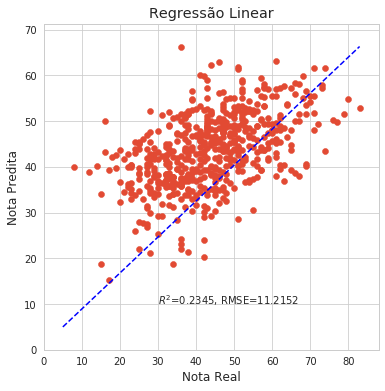

In [24]:
# Visualizando o modelo
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, predictions)
ax.plot([5, y_test.max()], [5, predictions.max()], '--k', c='blue')
ax.set_ylabel('Nota Predita')
ax.set_xlabel('Nota Real')
ax.set_title('Regressão Linear')
ax.text(30, 10, r'$R^2$=%.4f, RMSE=%.4f' % (
    metrics.r2_score(y_test, predictions), np.sqrt(metrics.mean_squared_error(y_test, predictions))))
ax.set_xlim([0,  y_test.max()+5])
ax.set_ylim([0, predictions.max()+5])
plt.show()

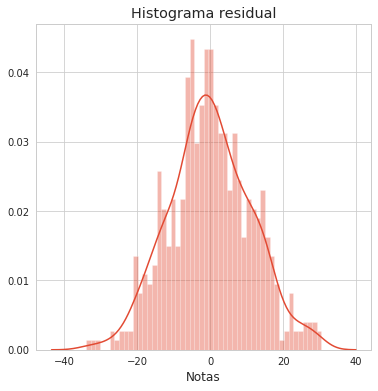

In [25]:
### Histograma residual
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot((y_test - predictions), bins=50)
ax.set_title('Histograma residual')
ax.set_xlabel('Notas')
plt.show()